In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
import random

In [37]:
num_side = 100
X = np.zeros((num_side, num_side))
# X = np.random.rand(50, 50)
X[25, 25] = 1
X[45, 75] = 1

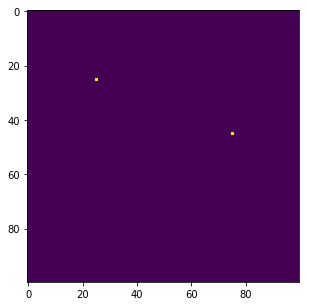

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# fig.autofmt_xdate(rotation=45)
im = ax.imshow(X, cmap='viridis', interpolation='nearest')#, vmin=-1, vmax=1)
# fig.colorbar(im)
# ax.set_xticks(np.arange(len(data_fields+['DeltaE'])))
# ax.set_yticks(np.arange(len(data_fields+['DeltaE'])))
# ax.set_xticklabels(data_fields+['DeltaE'])
# ax.set_yticklabels(data_fields+['DeltaE'])
# ax.set_title('Correlation Matrix');

In [40]:
for x,y in np.nonzero(X):
    print(x,y)

25 45
25 75


In [47]:
random.seed(123)
random.random()

0.052363598850944326

In [48]:
def interaction(prob):
    rnd_nr = random.random()
    if rnd_nr <= prob:
        rtn = 1
    else:
        rtn = 0
    return rtn

In [68]:
int_ = []
for _ in range(10000):
    int_.append(interaction(0.2))
np.mean(int_)

0.1956